Example by Y. Natsume (2022). For more information, please look at: https://medium.com/@natsunoyuki/hidden-markov-models-with-python-c026f778dfa7



In [ ]:
!pip install hmmlearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


0          NaN
1         0.00
2         0.23
3        -3.28
4         2.78
         ...  
11146     3.07
11147    14.30
11148    -2.05
11149   -21.97
11150     1.84
Name: gold_price_change, Length: 11151, dtype: float64
<class 'pandas.core.series.Series'>
0          NaN
1         0.00
2         0.23
3        -3.28
4         2.78
         ...  
11146     3.07
11147    14.30
11148    -2.05
11149   -21.97
11150     1.84
Name: gold_price_change, Length: 11151, dtype: float64


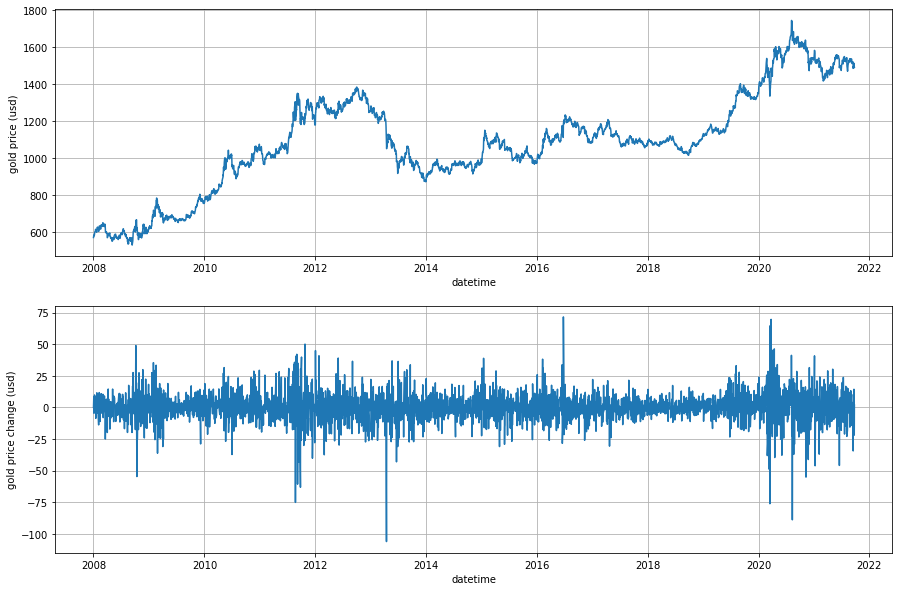

In [ ]:
base_dir = "https://github.com/natsunoyuki/Data_Science/blob/master/gold/gold/gold_price_usd.csv?raw=True"

data = pd.read_csv(base_dir)

# Convert the datetime from str to datetime object.
data["datetime"] = pd.to_datetime(data["datetime"])

# Determine the daily change in gold price.
data["gold_price_change"] = data["gold_price_usd"].diff()
print(data["gold_price_change"])
print(type(data["gold_price_change"]))
print(data["gold_price_change"][:])

# Restrict the data to later than 2008 Jan 01.
data = data[data["datetime"] >= pd.to_datetime("2008-01-01")]

# Plot the daily gold prices as well as the daily change.
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(data["datetime"], data["gold_price_usd"])
plt.xlabel("datetime")
plt.ylabel("gold price (usd)")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(data["datetime"], data["gold_price_change"])
plt.xlabel("datetime")
plt.ylabel("gold price change (usd)")
plt.grid(True)
plt.show()






In [ ]:
print(data)

         datetime  gold_price_usd
0      1978-12-29          137.06
1      1979-01-01          137.06
2      1979-01-02          137.29
3      1979-01-03          134.01
4      1979-01-04          136.79
...           ...             ...
11146  2021-09-20         1499.15
11147  2021-09-21         1513.45
11148  2021-09-22         1511.40
11149  2021-09-23         1489.43
11150  2021-09-24         1491.27

[11151 rows x 2 columns]


In [ ]:
# Use the daily change in gold price as the observed measurements X.


X = data["gold_price_usd"].values
print(X)
print(type(X))
# Build the HMM model and fit to the gold price change data.
# When fitting a model your X needs to be 2D array. i.e (n_samples, n_features). When you use .reshape(1, -1) it adds one dimension to the data
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 50, random_state = 42)
model.fit(X.reshape(-1,1))
# Predict the hidden states corresponding to observed X.
Z = model.predict(X.reshape(-1,1))
states = pd.unique(Z)
print(states)
print(Z)


[ 570.26  575.02  583.36 ... 1511.4  1489.43 1491.27]
<class 'numpy.ndarray'>
[2 0 1]
[2 2 2 ... 1 0 1]


In [ ]:
print("\nStart probabilities:")
print(model.startprob_)


Start probabilities:
[3.31009214e-88 1.62324283e-75 1.00000000e+00]


In [ ]:
print("\nTransition matrix:")
print(model.transmat_)


Transition matrix:
[[1.20915136e-03 9.98790849e-01 4.14674897e-27]
 [9.92030062e-01 7.96993774e-03 1.96285688e-25]
 [1.45418244e-03 2.46444928e-04 9.98299373e-01]]


In [ ]:
print("\nGaussian distribution means:")
print(model.means_)


Gaussian distribution means:
[[1169.15582779]
 [1169.23647994]
 [ 662.38668079]]


In [ ]:
print("\nGaussian distribution covariances:")
print(model.covars_)


Gaussian distribution covariances:
[[[36919.80419654]]

 [[36901.52825346]]

 [[ 5952.40240182]]]


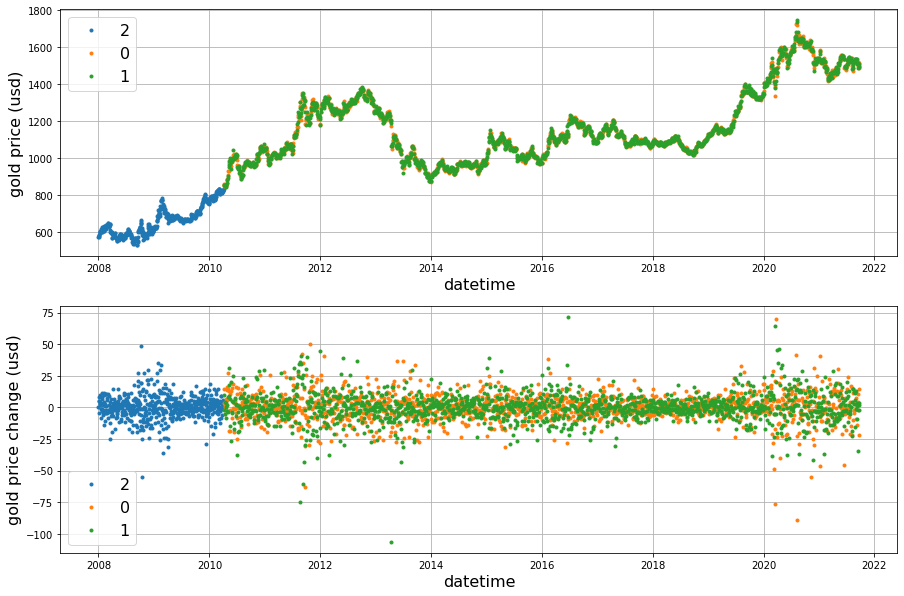

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (Z == i)
    x = data["datetime"].iloc[want]
    y = data["gold_price_usd"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold price (usd)", fontsize=16)
plt.subplot(2,1,2)
for i in states:
    want = (Z == i)
    x = data["datetime"].iloc[want]
    y = data["gold_price_change"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold price change (usd)", fontsize=16)
plt.show()